In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sb

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

In [30]:
address = "/content/sample_data/titanic-training-data.csv"
titanic = pd.read_csv(address)

In [31]:
titanic.columns = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Sibsp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Sibsp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Handling Missing Values

In [32]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   Sibsp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='Survived', ylabel='count'>

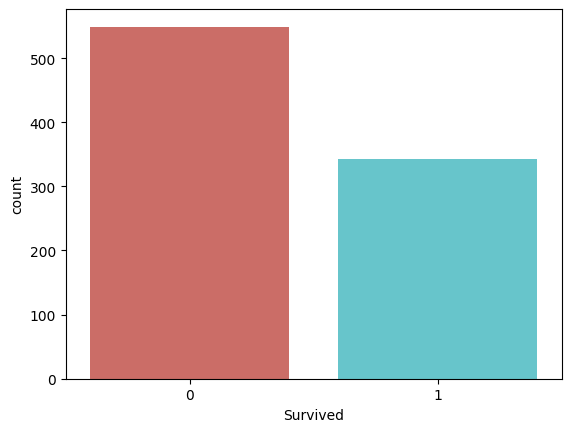

In [33]:
sb.countplot(x='Survived', data=titanic, palette='hls')

In [34]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
Sibsp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [35]:
titanic = titanic.drop(['Name', 'Ticket', 'Cabin'], axis=1)
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,Sibsp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


<Axes: xlabel='Parch', ylabel='Age'>

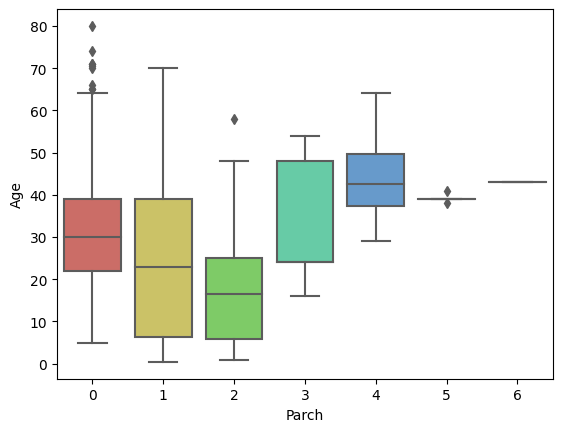

In [36]:
sb.boxplot(x='Parch', y='Age', data=titanic, palette='hls')

In [37]:
parch_group = titanic.groupby(titanic['Parch'])
parch_group.mean()

<ipython-input-37-666c40d5d040>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  parch_group.mean()


,PassengerId,Survived,Pclass,Age,Sibsp,Fare
Parch,,,,,,
0,445.255162,0.343658,2.321534,32.178503,0.237463,25.586774
1,465.110169,0.550847,2.203390,24.422000,1.084746,46.778180
2,416.662500,0.500000,2.275000,17.216912,2.062500,64.337604
3,579.200000,0.600000,2.600000,33.200000,1.000000,25.951660
4,384.000000,0.000000,2.500000,44.500000,0.750000,84.968750
5,435.200000,0.200000,3.000000,39.200000,0.600000,32.550000
6,679.000000,0.000000,3.000000,43.000000,1.000000,46.900000


In [38]:
def age_approx(cols):
  Age = cols[0]
  Parch = cols[1]

  if pd.isnull(Age):
    if Parch == 0:
      return 32
    elif Parch == 1:
      return 24
    elif Parch == 2:
      return 17
    elif Parch == 3:
      return 33
    elif Parch == 4:
      return 45
    elif Parch == 5:
      return 24
    else:
      return 30
  else:
    return Age


In [39]:
titanic['Age'] = titanic[['Age', 'Parch']].apply(age_approx, axis=1)


In [40]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Sibsp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [41]:
titanic.dropna(inplace=True)
titanic.reset_index(inplace=True, drop=True)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   Sibsp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.6+ KB


# Converting Categorical Variables to a dummy indicators

In [42]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
gender_encode = titanic['Sex']
gender = label_encoder.fit_transform(gender_encode)
gender[0:5]

# 1= male, 0=female

array([1, 0, 0, 0, 1])

In [43]:
gender = pd.DataFrame(gender, columns = ['Male'])
gender.head()

,Male
0,1
1,0
2,0
3,0
4,1


In [44]:
embarked_encode = titanic['Embarked']
embarked = label_encoder.fit_transform(embarked_encode)
embarked[0:100]

array([2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       1, 2, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2])

One Hot Encoding

In [45]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(categories='auto')
embarked_onehot = onehotencoder.fit_transform(embarked.reshape(-1,1))
embarked_onehot_mat = embarked_onehot.toarray()
embarked =pd.DataFrame(embarked_onehot_mat, columns=['C', 'Q', 'S'])
embarked.head()

,C,Q,S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [48]:
titanic.drop(['Sex', 'Embarked'], axis = 1, inplace=True)

In [49]:
titanic.head()

,PassengerId,Survived,Pclass,Age,Sibsp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [51]:
titanic = pd.concat([titanic, gender, embarked], axis=1, verify_integrity=True).astype(float)
titanic.head()

,PassengerId,Survived,Pclass,Age,Sibsp,Parch,Fare,Male,C,Q,S
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,0.0,1.0
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,1.0,0.0,0.0
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,0.0,1.0
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,0.0,1.0
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,0.0,1.0


# Checking Independence Between Features

<Axes: >

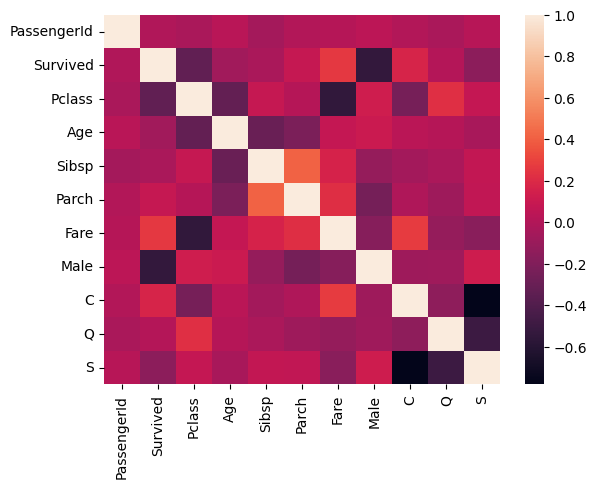

In [52]:
sb.heatmap(titanic.corr())

In [53]:
titanic.drop(['Fare', 'Pclass'], axis=1, inplace=True)
titanic.head()

,PassengerId,Survived,Age,Sibsp,Parch,Male,C,Q,S
0,1.0,0.0,22.0,1.0,0.0,1.0,0.0,0.0,1.0
1,2.0,1.0,38.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3.0,1.0,26.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4.0,1.0,35.0,1.0,0.0,0.0,0.0,0.0,1.0
4,5.0,0.0,35.0,0.0,0.0,1.0,0.0,0.0,1.0


# Dividing Data in Training and Testing

In [54]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    float64
 1   Survived     889 non-null    float64
 2   Age          889 non-null    float64
 3   Sibsp        889 non-null    float64
 4   Parch        889 non-null    float64
 5   Male         889 non-null    float64
 6   C            889 non-null    float64
 7   Q            889 non-null    float64
 8   S            889 non-null    float64
dtypes: float64(9)
memory usage: 62.6 KB


In [55]:
x_train, x_test, y_train, y_test = train_test_split(titanic.drop('Survived', axis=1),
                                                    titanic['Survived'], test_size=0.2,
                                                    random_state=200)

In [57]:
print(x_train.shape)
print(y_train.shape)

(711, 8)
(711,)


# Deplyoing and Evaluating Model

In [58]:
LogReg = LogisticRegression(solver='liblinear')
LogReg.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [59]:
y_pred = LogReg.predict(x_test)

# Model Evaluation

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85       109
         1.0       0.79      0.71      0.75        69

    accuracy                           0.81       178
   macro avg       0.81      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178



K-Fold Cross Validation and Confusion Matrix

In [62]:
y_train_pred = cross_val_predict(LogReg, x_train, y_train, cv=5)
confusion_matrix(y_train, y_train_pred)

array([[377,  63],
       [ 91, 180]])

In [63]:
precision_score(y_train, y_train_pred)

0.7407407407407407

Test Prediction

In [65]:
test_pass = np.array([866, 40, 0, 0, 0, 0, 0, 1]).reshape(1, -1)
print(LogReg.predict(test_pass))
print(LogReg.predict_proba(test_pass))

[1.]
[[0.26351831 0.73648169]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
